In [1]:
from epyc import JSONLabNotebook
import epydemic
import numpy as np
import pandas as pd
from epydemic import SEIR, Monitor
import string
from parameters import *

# Read gathered data and create dataframes.

In [2]:
json_lab_3 = JSONLabNotebook(get_out_path("ex_3_seir"), create=False)
json_lab_4 = JSONLabNotebook(get_out_path("ex_4_seir"), create=False)

In [3]:
dfs_1 = [json_lab_3.dataframe(tag=rs) for rs in json_lab_3.resultSets()]
dfs_2 = [json_lab_4.dataframe(tag=rs) for rs in json_lab_4.resultSets()]
dfs = dfs_1 + dfs_2
df = pd.concat(dfs)
df["R-Equilibrium"] = df[SEIR.REMOVED] / n

# Data Visualization to show the time each simulation took to reach equilibrium vs contact tracing accuracy.

/tmp/ipykernel_346890/317350352.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(mean_eq, 'k.', marker="s", label="Ensemble Average",  markersize=3)


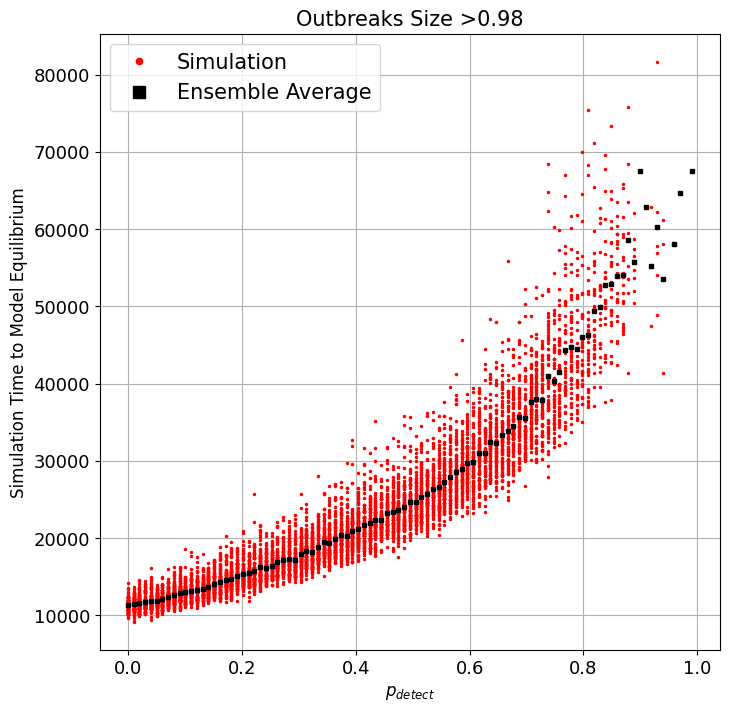

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

res = df[df["R-Equilibrium"] > 0.98]


mean_eq = res.groupby('pDetect')["epydemic.monitor.time"].mean() 

ax.plot(res["pDetect"],
        (res["epydemic.monitor.time"]), 'r.', label="Simulation", markersize=3)

ax.plot(mean_eq, 'k.', marker="s", label="Ensemble Average",  markersize=3)



ax.set_xlabel('$p_{detect}$')
ax.set_ylabel('Simulation Time to Model Equilibrium')



ax.set_title('Outbreaks Size >0.98', fontsize=15)
ax.yaxis.get_label().set(fontsize=12)
ax.xaxis.get_label().set(fontsize=12)


plt.grid(which='major')


plt.legend()

_ = plt.show()